In [1]:
import os
os.getcwd()   #show current working directory

'C:\\Users\\MN\\Downloads'

In [2]:
import pandas as pd
df = pd.read_csv("tree.csv")  #import Dataset
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [4]:
df=df.drop("Days",axis=1)#drop unimportant column

In [5]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


In [7]:
df.info()#see data type for all column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [8]:
y = df["Wear Jacket?"]#assign label column in y variable
y.head()

0     No
1    Yes
2     No
3    Yes
4    Yes
Name: Wear Jacket?, dtype: object

In [10]:
x = df.drop("Wear Jacket?", axis=1)#assign all feature  column in x variable

In [11]:
x.head()

,Outlook,Temprature,Routine
0,Sunny,Cold,Indoor
1,Cloudy,Cold,Indoor
2,Cloudy,Warm,Outdoor
3,Sunny,Cold,Outdoor
4,Cloudy,Cold,Outdoor


# label_Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
x['Outlook'] = label.fit_transform(df["Outlook"])
x['Temprature'] = label.fit_transform(df["Temprature"])
x['Routine'] = label.fit_transform(df["Routine"])

In [13]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


# Apply Decision Tree Algorithom

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [15]:
clf.fit(x, y)  # train with full data

DecisionTreeClassifier()

In [16]:
clf.predict([[1, 0, 1]])  # sunny-> 1, cold -> 0, outdoor -> 1

array(['Yes'], dtype=object)

In [17]:
clf.predict([[1, 1, 0]])  # sunny-> 1, warm -> 1, indoor -> 0

array(['No'], dtype=object)

[Text(223.20000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(167.4, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

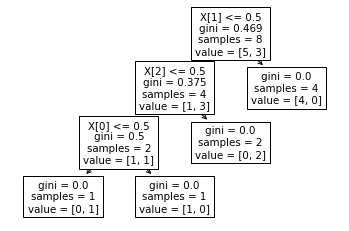

In [18]:
from sklearn import tree
tree.plot_tree(clf)

[Text(223.20000000000002, 190.26, 'X[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(167.4, 135.9, 'X[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

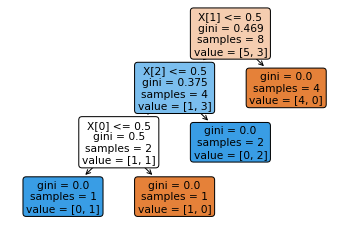

In [19]:
tree.plot_tree(clf,filled=True,rounded=True)

In [20]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(223.20000000000002, 190.26, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(167.4, 135.9, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(111.60000000000001, 81.53999999999999, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(55.800000000000004, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(167.4, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 81.53999999999999, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(279.0, 135.9, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

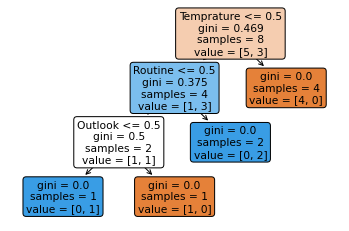

In [21]:
tree.plot_tree(clf,filled=True,rounded=True, feature_names=x.columns)

[Text(372.0, 475.65000000000003, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(279.0, 339.75, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(186.0, 203.85000000000002, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(93.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(279.0, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(372.0, 203.85000000000002, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(465.0, 339.75, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]')]

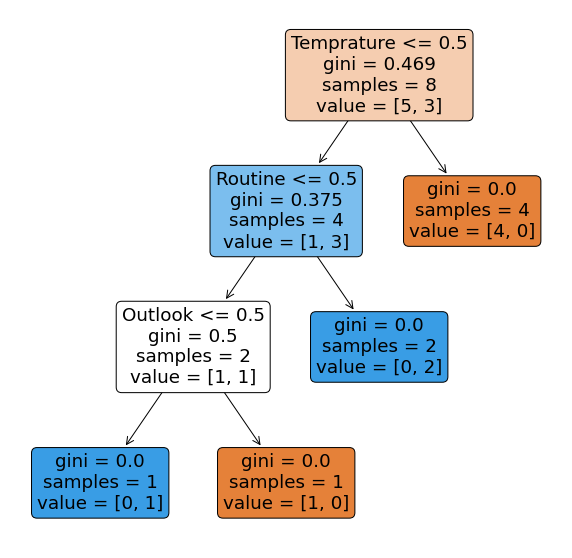

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)